In [2]:
import pandas as pd
import sqlite3
from bootcampviztools import *
import matplotlib.pyplot as plt

### Leemos el CSV creado antes ya limpio en el otro notebook

In [457]:
nba = pd.read_csv("./data/nba.csv")

#### Los equipos de la Conferencia Oeste escogidos son: OKC, LAC, MEM, SAS, GSW
#### Los equipos de la Conferencia Este escogidos son: CLE, TOR, BOS, MIA

- Creo una lista de dataframes con solo los datos según equipos

In [458]:
teams = []
lista_equipos = ['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA']
for equipo in lista_equipos:
    muestra = nba[(nba.Local == equipo) | (nba.Visitante == equipo)]
    teams.append(muestra)

In [459]:
teams[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 6 to 19954
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Partido                              1281 non-null   object 
 1   Local                                1281 non-null   object 
 2   Visitante                            1281 non-null   object 
 3   Temporada                            1281 non-null   int64  
 4   Puntos Local                         1281 non-null   float64
 5   Puntos Visitante                     1281 non-null   float64
 6   Puntos en zona Local                 1281 non-null   float64
 7   Puntos 2a oportunidad Local          1281 non-null   float64
 8   Puntos en transición Local           1281 non-null   float64
 9   Triples Local                        1281 non-null   float64
 10  Triples intentados Local             1281 non-null   float64
 11  % triples Local                   

In [462]:
teams[4]

,Partido,Local,Visitante,Temporada,Puntos Local,Puntos Visitante,Puntos en zona Local,Puntos 2a oportunidad Local,Puntos en transición Local,Triples Local,...,Puntos de media distancia Local,Puntos de media distancia Visitante,Puntos en zona Total,Puntos de media distancia Total,Puntos de 3 Total,Puntos tiros libres Total,Puntos en transición Total,Puntos Total,Triples intentados Total,Triples encestados Total
14,MIN vs. SAC,MIN,SAC,2006,92.0,83.0,32.0,6.0,5.0,4.0,...,38.0,22.0,72.0,60.0,21.0,36.0,9.0,175.0,24.0,7.0
42,SAC vs. MIN,SAC,MIN,2006,93.0,81.0,44.0,14.0,15.0,6.0,...,24.0,26.0,84.0,50.0,30.0,30.0,29.0,174.0,37.0,10.0
51,LAL vs. MIN,MIN,LAL,2006,95.0,88.0,50.0,17.0,14.0,5.0,...,20.0,18.0,100.0,38.0,21.0,38.0,18.0,183.0,32.0,7.0
90,MIN vs. POR,POR,MIN,2006,101.0,89.0,32.0,5.0,6.0,3.0,...,44.0,24.0,70.0,68.0,24.0,44.0,10.0,190.0,18.0,8.0
105,CLE vs. MIN,CLE,MIN,2006,92.0,76.0,36.0,15.0,19.0,5.0,...,28.0,24.0,68.0,52.0,18.0,42.0,30.0,168.0,21.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19898,DEN vs. MIN,DEN,MIN,2022,109.0,80.0,48.0,12.0,16.0,16.0,...,34.0,24.0,84.0,58.0,81.0,20.0,19.0,189.0,75.0,27.0
19904,DEN vs. MIN,DEN,MIN,2022,122.0,113.0,56.0,15.0,19.0,10.0,...,36.0,36.0,100.0,72.0,72.0,39.0,35.0,235.0,53.0,24.0
19910,MIN vs. DEN,DEN,MIN,2022,111.0,120.0,60.0,7.0,13.0,10.0,...,12.0,44.0,112.0,56.0,69.0,40.0,28.0,231.0,59.0,23.0
19918,MIN vs. DEN,DEN,MIN,2022,114.0,108.0,54.0,7.0,14.0,13.0,...,30.0,30.0,108.0,60.0,75.0,29.0,24.0,222.0,69.0,25.0


#### Me quedo con los datos que me interesan por equipo:
1. Puntos
2. Puntos en zona
3. Tiros libres
4. Puntos de triple
5. Triples intentados
6. Puntos de media distancia

In [463]:
for i, equipo in enumerate(lista_equipos):
    for j,valor in teams[i].Local.items():
        if lista_equipos[i] == valor:
            teams[i][f'Puntos'] = teams[i]['Puntos Local']
            teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Local']
            teams[i][f'Tiros Libres'] = teams[i]['Tiros libres Local']
            teams[i][f'Puntos de 3'] = teams[i]['Triples Local']*3
            teams[i][f'Triples intentados'] = teams[i]['Triples intentados Local']
            teams[i][f'Puntos de media distancia'] = teams[i]['Puntos de media distancia Local']
        else:
            teams[i][f'Puntos'] = teams[i]['Puntos Visitante']
            teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Visitante']
            teams[i][f'Tiros Libres'] = teams[i]['Tiros libres Visitante']
            teams[i][f'Puntos de 3'] = teams[i]['Triples Visitante']*3
            teams[i][f'Triples intentados'] = teams[i]['Triples intentados Visitante']
            teams[i][f'Puntos de media distancia'] = teams[i]['Puntos de media distancia Visitante']
            
    columnas_a_conservar = ['Partido','Local','Visitante','Temporada',f'Puntos',f'Tiros Libres',f'Puntos en Zona', f'Puntos de 3',f'Triples intentados',f'Puntos de media distancia']
    teams[i] = teams[i][columnas_a_conservar]


/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_24048/667945428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams[i][f'Puntos'] = teams[i]['Puntos Local']
/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_24048/667945428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams[i][f'Puntos en Zona'] = teams[i]['Puntos en zona Local']
/var/folders/pj/f8hslcw56411qpfnn2sxfqrm0000gn/T/ipykernel_24048/667945428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [464]:
teams[0]

,Partido,Local,Visitante,Temporada,Puntos,Tiros Libres,Puntos en Zona,Puntos de 3,Triples intentados,Puntos de media distancia
6,GSW vs. LAL,GSW,LAL,2006,98.0,27.0,44.0,9.0,19.0,24.0
21,GSW vs. POR,GSW,POR,2006,102.0,21.0,58.0,15.0,11.0,18.0
34,UTA vs. GSW,GSW,UTA,2006,106.0,15.0,36.0,15.0,11.0,50.0
41,DAL vs. GSW,DAL,GSW,2006,104.0,17.0,44.0,33.0,30.0,32.0
48,NOK vs. GSW,GSW,NOK,2006,97.0,15.0,44.0,18.0,15.0,32.0
...,...,...,...,...,...,...,...,...,...,...
19939,GSW vs. LAL,GSW,LAL,2022,127.0,10.0,48.0,63.0,42.0,48.0
19942,LAL vs. GSW,GSW,LAL,2022,127.0,28.0,44.0,45.0,31.0,40.0
19946,LAL vs. GSW,GSW,LAL,2022,104.0,20.0,52.0,18.0,25.0,26.0
19951,GSW vs. LAL,LAL,GSW,2022,121.0,14.0,52.0,39.0,35.0,42.0


#### Ahora agrupo todos los dataframes por temporada

In [534]:
teams_agrupados = []
for i in range(len(lista_equipos)):
    muestra = []
    muestra = teams[i].groupby('Temporada').sum()
    teams_agrupados.append(muestra)
    teams_agrupados[i]['Partidos por Temporada'] = teams[i]['Temporada'].value_counts()
    columnas_a_eliminar = ['Partido','Local','Visitante']
    teams_agrupados[i] = teams_agrupados[i].drop(columns=columnas_a_eliminar)

In [535]:
teams_agrupados[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2006 to 2022
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Puntos                     17 non-null     float64
 1   Tiros Libres               17 non-null     float64
 2   Puntos en Zona             17 non-null     float64
 3   Puntos de 3                17 non-null     float64
 4   Triples intentados         17 non-null     float64
 5   Puntos de media distancia  17 non-null     float64
 6   Partidos por Temporada     17 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 1.1 KB


### Y hago otro dataframe con las medias

In [536]:
teams_medias = []
for i, equipo in enumerate(lista_equipos):
    muestra = pd.DataFrame()
    teams_medias.append(muestra)
    teams_medias[i][f'Media Puntos'] = (teams_agrupados[i][f'Puntos'])/(teams_agrupados[i]['Partidos por Temporada'])
    teams_medias[i][f'Media Puntos Triples'] = teams_agrupados[i][f'Puntos de 3']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Triples intentados'] = teams_agrupados[i][f'Triples intentados']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Triples encestados'] = (teams_agrupados[i][f'Puntos de 3']/3)/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Puntos de media distancia'] = teams_agrupados[i][f'Puntos de media distancia']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Tiros Libres'] = teams_agrupados[i][f'Tiros Libres']/teams_agrupados[i]['Partidos por Temporada']
    teams_medias[i][f'Media Puntos en Zona'] = teams_agrupados[i][f'Puntos en Zona']/teams_agrupados[i]['Partidos por Temporada']
    

In [537]:
for i in range(len(lista_equipos)):
    teams_medias[i] = teams_medias[i].reset_index()

- Ahora ya con las medias conseguidas para cualquier equipo, ya puedo empezar a pintar:

# El orden es: 'GSW' (0), 'LAC' (1), 'MEM' (2), 'SAS' (3), 'MIN' (4), 'CLE' (5), 'TOR' (6), 'BOS' (7), 'MIA' (8)

In [538]:
teams_medias[0]

,Temporada,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
0,2006,111.356164,26.136986,22.547945,8.712329,35.013699,21.931507,45.698630
1,2007,111.324675,24.740260,23.415584,8.246753,36.363636,20.298701,46.415584
2,2008,112.746032,20.666667,17.619048,6.888889,36.476190,22.936508,46.444444
3,2009,112.608108,21.243243,18.959459,7.081081,38.405405,21.878378,45.243243
4,2010,107.698795,24.253012,20.891566,8.084337,36.000000,19.879518,43.734940
5,2011,100.615385,22.326923,19.942308,7.442308,37.461538,16.711538,39.000000
6,2012,98.058824,19.235294,19.705882,6.411765,30.941176,19.529412,41.176471
7,2013,102.089744,24.115385,22.230769,8.038462,35.461538,17.666667,40.923077
8,2014,106.329897,27.525773,24.082474,9.175258,35.381443,18.432990,43.340206
9,2015,110.418367,31.561224,27.469388,10.520408,38.204082,18.775510,42.918367


## La hipótesis entonces por equipos es:
### Se produjo una subida en los GSW en (1) los puntos viniendo de triple y (2) en el aumento de puntos por partido, a partir de la temporada 12-13 (cuando ya Curry estaba acompañado por su equipo), empezando a carburar durante 2 años, consiguiendo su primer anillo (de 3 totales) en el 14-15, y causando que la NBA se adaptara a ellos buscando lo mismo

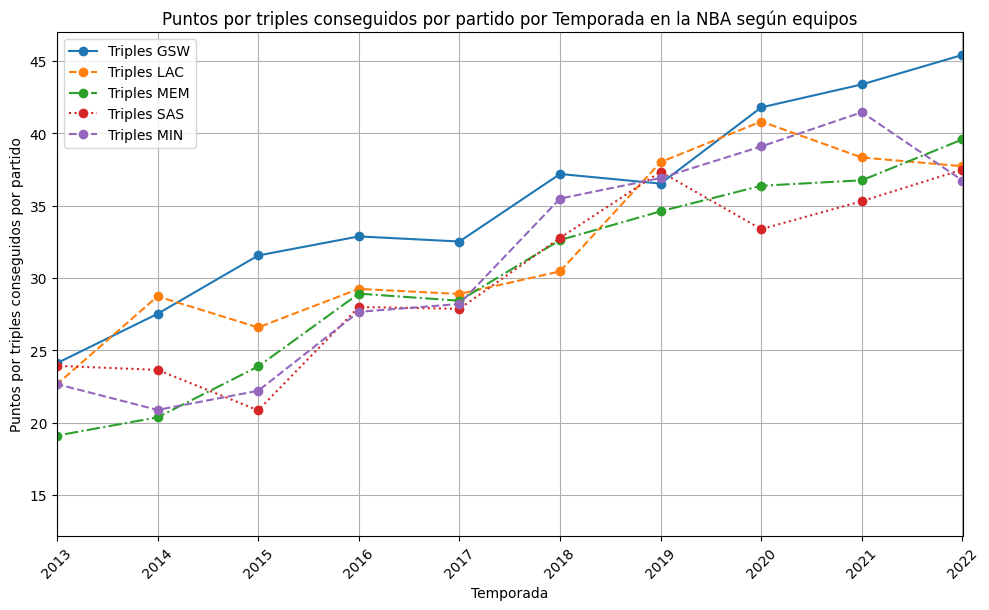

In [539]:
#Comparación conferencia Oeste

plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos Triples'], marker='o', linestyle='-', label = 'Triples GSW')
plt.plot(teams_medias[1].Temporada, teams_medias[1]['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples LAC')
plt.plot(teams_medias[2].Temporada, teams_medias[2]['Media Puntos Triples'], marker='o', linestyle='-.', label = 'Triples MEM')
plt.plot(teams_medias[3].Temporada, teams_medias[3]['Media Puntos Triples'], marker='o', linestyle=':', label = 'Triples SAS')
plt.plot(teams_medias[4].Temporada, teams_medias[4]['Media Puntos Triples'], marker='o', linestyle='dashed', label = 'Triples MIN')

plt.xlabel('Temporada')
plt.xlim([2013,2022])
plt.ylabel('Puntos por triples conseguidos por partido')
plt.title('Puntos por triples conseguidos por partido por Temporada en la NBA según equipos')
plt.grid(True)

plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

#### Clippers tiene más tiros de 3
#### Es claro en Minnesota
#### MEM se adaptó mejor, con una subida muy brusca en 2016 (después de la temporada 73-9 de GSW)
#### SAS también empezó subiendo en 2015 pero le costó mucho más

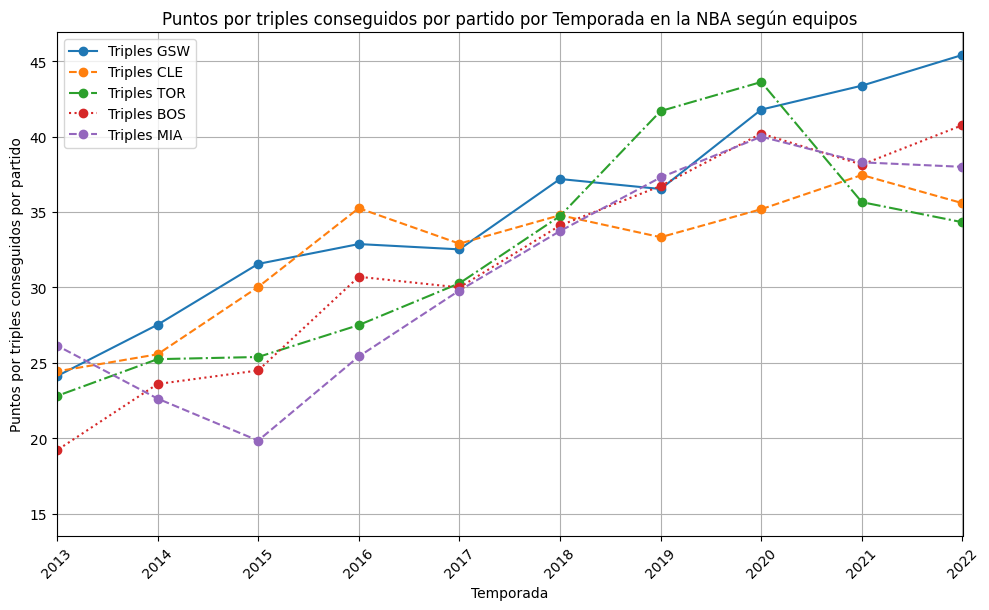

In [527]:
#Comparación conferencia Este

plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos Triples'], marker='o', linestyle='-', label = 'Triples GSW')
plt.plot(teams_medias[5].Temporada, teams_medias[5]['Media Puntos Triples'], marker='o', linestyle='--', label = 'Triples CLE')
plt.plot(teams_medias[6].Temporada, teams_medias[6]['Media Puntos Triples'], marker='o', linestyle='-.', label = 'Triples TOR')
plt.plot(teams_medias[7].Temporada, teams_medias[7]['Media Puntos Triples'], marker='o', linestyle=':', label = 'Triples BOS')
plt.plot(teams_medias[8].Temporada, teams_medias[8]['Media Puntos Triples'], marker='o', linestyle='dashed', label = 'Triples MIA')

# Configuraciones adicionales
plt.xlabel('Temporada')
plt.xlim([2013,2022])
plt.ylabel('Puntos por triples conseguidos por partido')
plt.title('Puntos por triples conseguidos por partido por Temporada en la NBA según equipos')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

#### No se puede sacar nada en claro de CLE con respecto a triples
#### En TOR la subida brusca llega tiempo después
#### En BOS se produce una subida similar a GSW pero desde más abajo (coincide y por tanto se adaptaron mejor)
#### En MIA la subida se produce en 2015 también


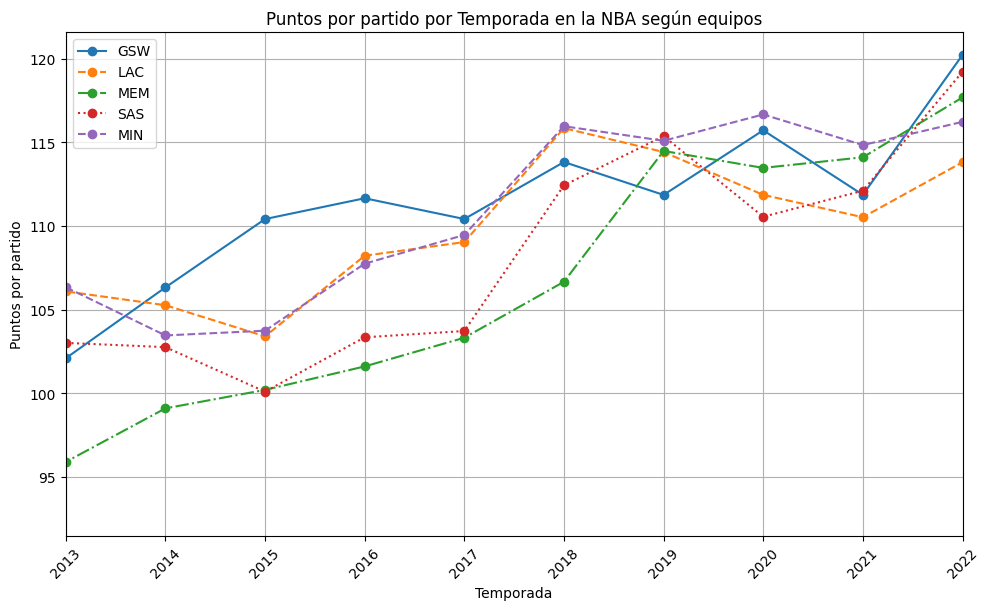

In [528]:
# Conferencia Oeste

plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos'], marker='o', linestyle='-', label = 'GSW')
plt.plot(teams_medias[1].Temporada, teams_medias[1]['Media Puntos'], marker='o', linestyle='--', label = 'LAC')
plt.plot(teams_medias[2].Temporada, teams_medias[2]['Media Puntos'], marker='o', linestyle='-.', label = 'MEM')
plt.plot(teams_medias[3].Temporada, teams_medias[3]['Media Puntos'], marker='o', linestyle=':', label = 'SAS')
plt.plot(teams_medias[4].Temporada, teams_medias[4]['Media Puntos'], marker='o', linestyle='dashed', label = 'MIN')

# Configuraciones adicionales
plt.xlim([2013,2022])
plt.xlabel('Temporada')
plt.ylabel('Puntos por partido')
plt.title('Puntos por partido por Temporada en la NBA según equipos')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

### En la conferencia oeste, al competir directamente con los Warriors, lo normal es que se adapten más rápido
#### Para MEM, MIN y SAS se ve clara el retraso en la subida de la pendiente
#### Para LAC, al tener ya anotaciones elevadas, se ve menos claro aun habiendo poca subida de las temporadas 2013-14 a 2015-16

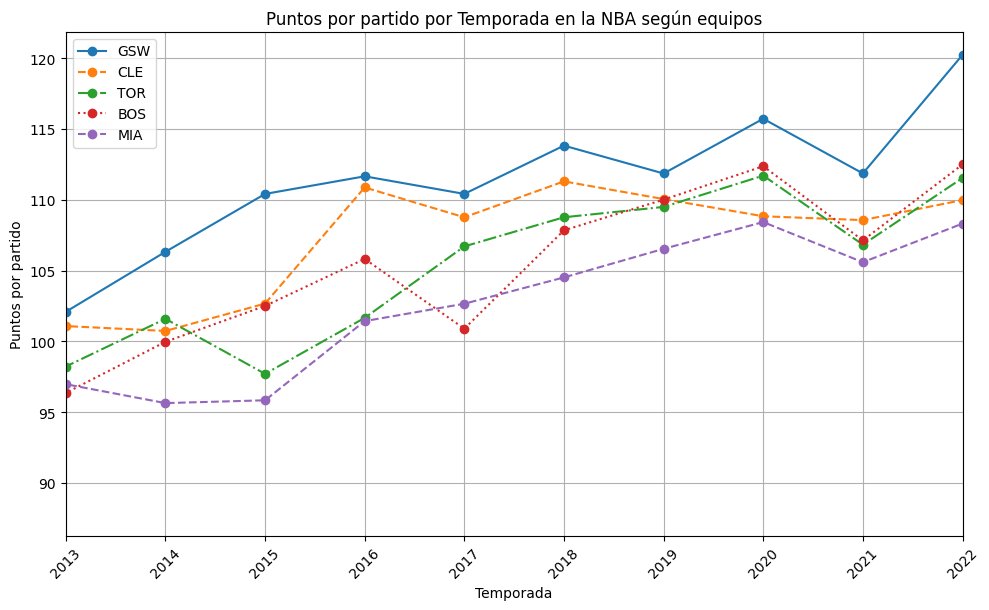

In [519]:
#Conferencia Este

plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Puntos'], marker='o', linestyle='-', label = 'GSW')
plt.plot(teams_medias[1].Temporada, teams_medias[5]['Media Puntos'], marker='o', linestyle='--', label = 'CLE')
plt.plot(teams_medias[2].Temporada, teams_medias[6]['Media Puntos'], marker='o', linestyle='-.', label = 'TOR')
plt.plot(teams_medias[3].Temporada, teams_medias[7]['Media Puntos'], marker='o', linestyle=':', label = 'BOS')
plt.plot(teams_medias[4].Temporada, teams_medias[8]['Media Puntos'], marker='o', linestyle='dashed', label = 'MIA')

# Configuraciones adicionales
plt.xlabel('Temporada')
plt.ylabel('Puntos por partido')
plt.xlim([2013,2022])
plt.title('Puntos por partido por Temporada en la NBA según equipos')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

En la conferencia Este, esta adaptación será más lenta
- Para MIA se ve claramente la subida a partir de 2015. 
- Para CLE se ve exactamente lo mismo (aunque no pasará lo mismo con respecto a los triples).
- Para TOR, aun habiendo una subida similar en 2014, existe la misma bajada en 2015 para volver en 2016
- BOS parece la excepción, justo coincidiendo con la llegada de Brad Stevens como entrenador en 2013 para darle una vuelta al equipo.

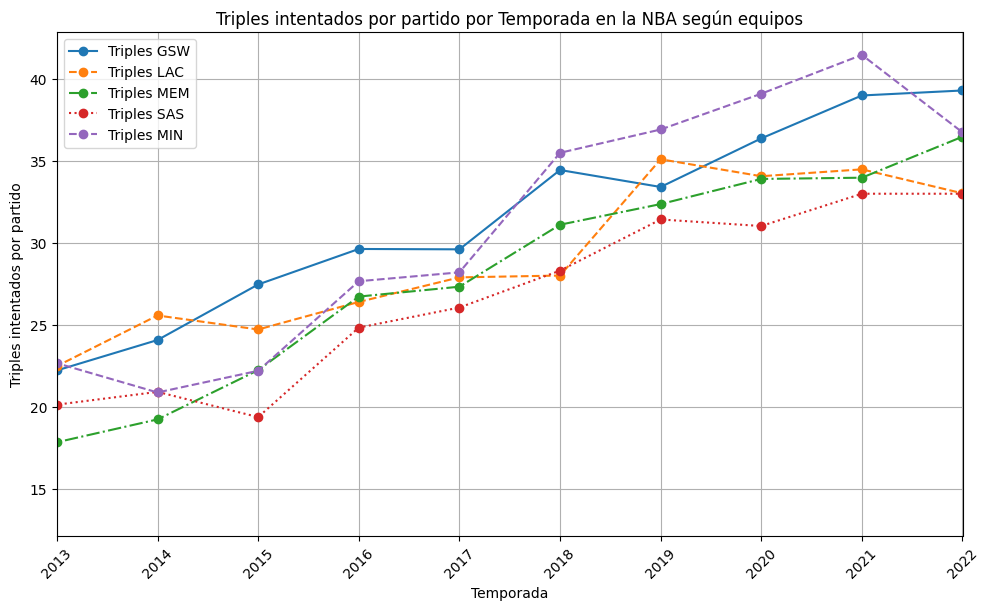

In [531]:
plt.figure(figsize=(10, 6))
plt.plot(teams_medias[0].Temporada, teams_medias[0]['Media Triples intentados'], marker='o', linestyle='-', label = 'Triples GSW')
plt.plot(teams_medias[1].Temporada, teams_medias[1]['Media Triples intentados'], marker='o', linestyle='--', label = 'Triples LAC')
plt.plot(teams_medias[2].Temporada, teams_medias[2]['Media Triples intentados'], marker='o', linestyle='-.', label = 'Triples MEM')
plt.plot(teams_medias[3].Temporada, teams_medias[3]['Media Triples intentados'], marker='o', linestyle=':', label = 'Triples SAS')
plt.plot(teams_medias[4].Temporada, teams_medias[4]['Media Puntos Triples'], marker='o', linestyle='dashed', label = 'Triples MIN')

# Configuraciones adicionales
plt.xlim([2013,2022])
plt.xlabel('Temporada')
plt.ylabel('Triples intentados por partido')
plt.title('Triples intentados por partido por Temporada en la NBA según equipos')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.legend()
plt.show()

- Ahora gráficos de barras

In [542]:
teams_medias[0]

,Temporada,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
0,2006,111.356164,26.136986,22.547945,8.712329,35.013699,21.931507,45.698630
1,2007,111.324675,24.740260,23.415584,8.246753,36.363636,20.298701,46.415584
2,2008,112.746032,20.666667,17.619048,6.888889,36.476190,22.936508,46.444444
3,2009,112.608108,21.243243,18.959459,7.081081,38.405405,21.878378,45.243243
4,2010,107.698795,24.253012,20.891566,8.084337,36.000000,19.879518,43.734940
5,2011,100.615385,22.326923,19.942308,7.442308,37.461538,16.711538,39.000000
6,2012,98.058824,19.235294,19.705882,6.411765,30.941176,19.529412,41.176471
7,2013,102.089744,24.115385,22.230769,8.038462,35.461538,17.666667,40.923077
8,2014,106.329897,27.525773,24.082474,9.175258,35.381443,18.432990,43.340206
9,2015,110.418367,31.561224,27.469388,10.520408,38.204082,18.775510,42.918367


In [543]:
for i in range(len(lista_equipos)):
    teams_medias[i] = teams_medias[i].set_index('Temporada')

In [489]:
for i in range(len(lista_equipos)):
    teams_medias[i] = teams_medias[i].reset_index()

In [544]:
teams_medias_temporadas = []
for i in range(len(teams_medias)):
    muestra = teams_medias[i].drop([2006,2007,2008,2009,2010,2011,2012,2017,2018,2019,2020,2021,2022])
    teams_medias_temporadas.append(muestra)

In [545]:
for i in range(len(lista_equipos)):
    teams_medias_temporadas[i] = teams_medias_temporadas[i].reset_index()

In [546]:
teams_medias_temporadas[0]

,Temporada,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
0,2013,102.089744,24.115385,22.230769,8.038462,35.461538,17.666667,40.923077
1,2014,106.329897,27.525773,24.082474,9.175258,35.381443,18.432990,43.340206
2,2015,110.418367,31.561224,27.469388,10.520408,38.204082,18.775510,42.918367
3,2016,111.663265,32.877551,29.632653,10.959184,36.040816,18.255102,46.408163


In [547]:
dicc_iterar = {
    '0': 7,
    '1': 8,
    '2': 9,
    '3': 10
}

- El orden es: 'GSW' (0), 'LAC' (1), 'MEM' (2), 'SAS' (3), 'MIN' (4), 'CLE' (5), 'TOR' (6), 'BOS' (7), 'MIA' (8)

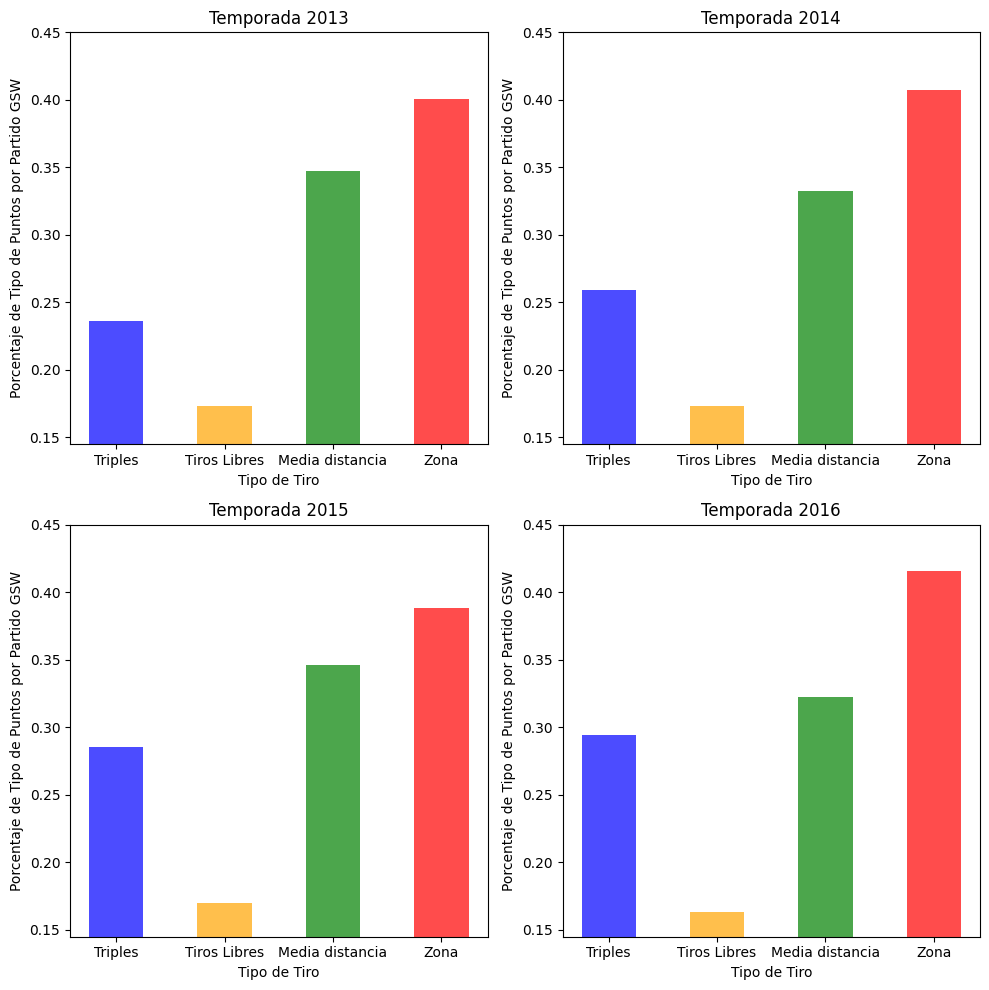

In [548]:
# WARRIORS

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido = teams_medias_temporadas[0]['Media Puntos'][i]
    puntos_por_partido_triples = teams_medias_temporadas[0]['Media Puntos Triples'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_libres = teams_medias_temporadas[0]['Media Tiros Libres'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_de_2 = teams_medias_temporadas[0]['Media Puntos de media distancia'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_en_zona = teams_medias_temporadas[0]['Media Puntos en Zona'][i] / total_puntos_por_partido

    # Crear un gráfico de pie para la temporada 
    ax = axs[i // 2, i % 2]
    ax.bar(['Triples', 'Tiros Libres', 'Media distancia', 'Zona'],
            [puntos_por_partido_triples , puntos_por_partido_tiros_libres, puntos_por_partido_tiros_de_2, puntos_por_partido_tiros_en_zona],
            color=['blue', 'orange', 'green', 'red'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+valor}')
    ax.set_ylim(0.145, 0.45)
    ax.set_xlabel('Tipo de Tiro')
    ax.set_ylabel('Porcentaje de Tipo de Puntos por Partido GSW')


# Mostrar los gráficos
plt.tight_layout()
plt.show()

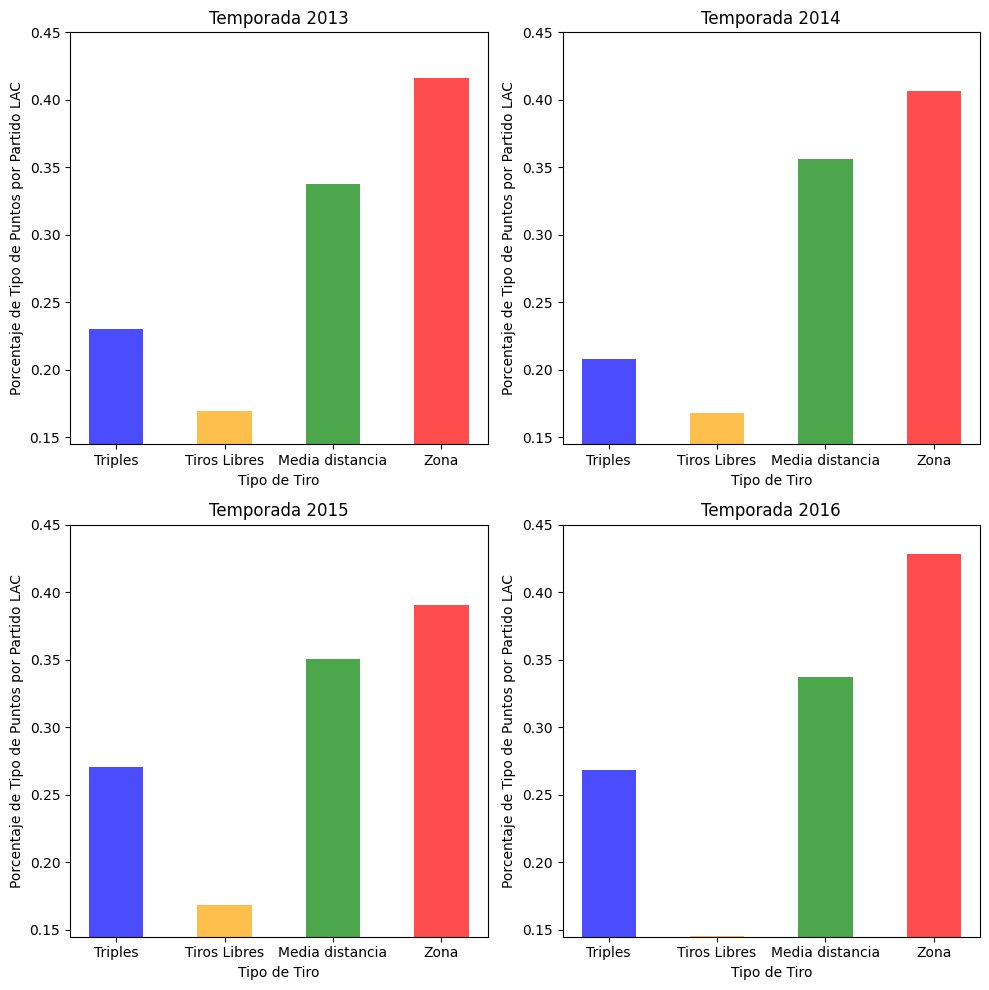

In [497]:
# SPURS

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido = teams_medias_temporadas[3]['Media Puntos'][i]
    puntos_por_partido_triples = teams_medias_temporadas[3]['Media Puntos Triples'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_libres = teams_medias_temporadas[3]['Media Tiros Libres'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_de_2 = teams_medias_temporadas[3]['Media Puntos de media distancia'][i] / total_puntos_por_partido
    puntos_por_partido_tiros_en_zona = teams_medias_temporadas[3]['Media Puntos en Zona'][i] / total_puntos_por_partido

    # Crear un gráfico de pie para la temporada 
    ax = axs[i // 2, i % 2]
    ax.bar(['Triples', 'Tiros Libres', 'Media distancia', 'Zona'],
            [puntos_por_partido_triples , puntos_por_partido_tiros_libres, puntos_por_partido_tiros_de_2, puntos_por_partido_tiros_en_zona],
            color=['blue', 'orange', 'green', 'red'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+valor}')
    ax.set_ylim(0.145, 0.45)
    ax.set_xlabel('Tipo de Tiro')
    ax.set_ylabel('Porcentaje de Tipo de Puntos por Partido LAC')


# Mostrar los gráficos
plt.tight_layout()
plt.show()

Ahora las gráficas pero solo de triples

In [549]:
teams_medias_temporadas[0]

,Temporada,Media Puntos,Media Puntos Triples,Media Triples intentados,Media Triples encestados,Media Puntos de media distancia,Media Tiros Libres,Media Puntos en Zona
0,2013,102.089744,24.115385,22.230769,8.038462,35.461538,17.666667,40.923077
1,2014,106.329897,27.525773,24.082474,9.175258,35.381443,18.432990,43.340206
2,2015,110.418367,31.561224,27.469388,10.520408,38.204082,18.775510,42.918367
3,2016,111.663265,32.877551,29.632653,10.959184,36.040816,18.255102,46.408163


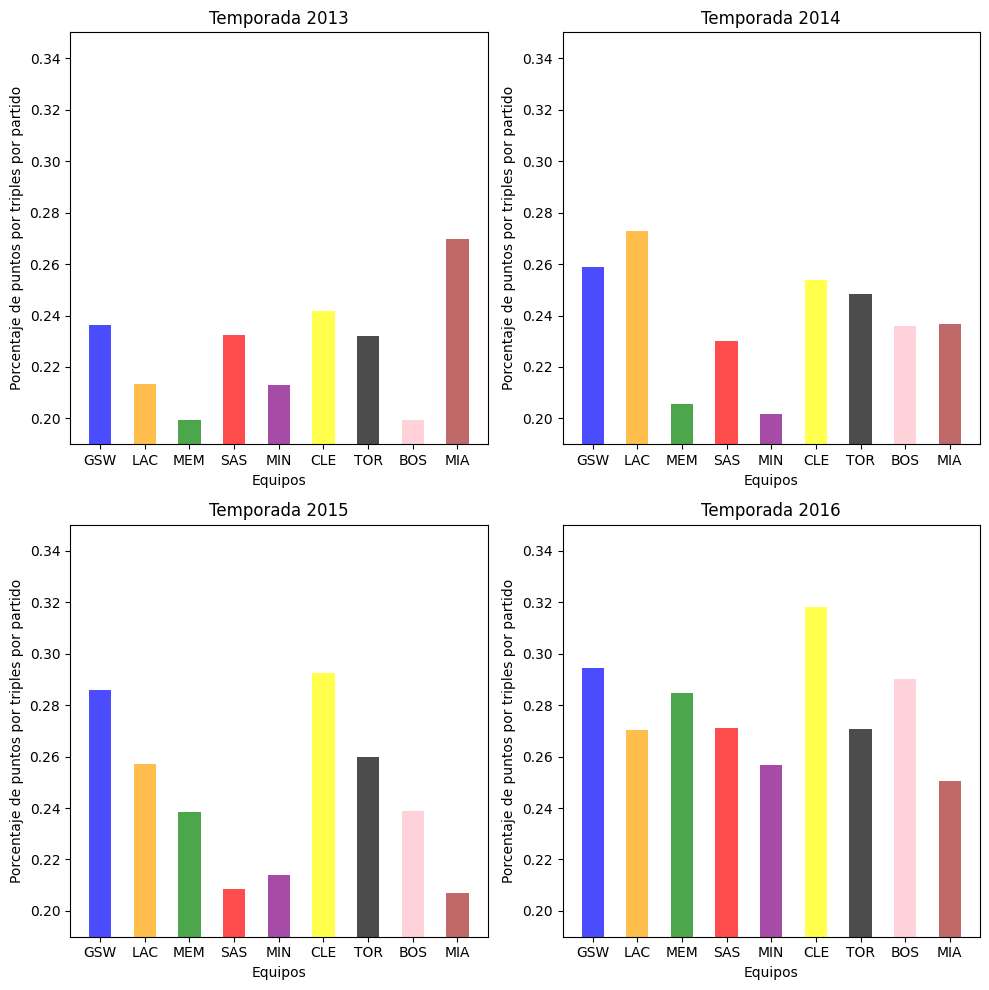

In [554]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido_gsw = teams_medias_temporadas[0]['Media Puntos'][i]
    puntos_por_partido_triples_gsw = teams_medias_temporadas[0]['Media Puntos Triples'][i] / total_puntos_por_partido_gsw
    total_puntos_por_partido_lac = teams_medias_temporadas[1]['Media Puntos'][i]
    puntos_por_partido_triples_lac = teams_medias_temporadas[1]['Media Puntos Triples'][i] / total_puntos_por_partido_lac
    total_puntos_por_partido_mem = teams_medias_temporadas[2]['Media Puntos'][i]
    puntos_por_partido_triples_mem = teams_medias_temporadas[2]['Media Puntos Triples'][i] / total_puntos_por_partido_mem
    total_puntos_por_partido_sas = teams_medias_temporadas[3]['Media Puntos'][i]
    puntos_por_partido_triples_sas = teams_medias_temporadas[3]['Media Puntos Triples'][i] / total_puntos_por_partido_sas
    total_puntos_por_partido_min = teams_medias_temporadas[4]['Media Puntos'][i]
    puntos_por_partido_triples_min = teams_medias_temporadas[4]['Media Puntos Triples'][i] / total_puntos_por_partido_min
    total_puntos_por_partido_cle = teams_medias_temporadas[5]['Media Puntos'][i]
    puntos_por_partido_triples_cle = teams_medias_temporadas[5]['Media Puntos Triples'][i] / total_puntos_por_partido_cle
    total_puntos_por_partido_tor = teams_medias_temporadas[6]['Media Puntos'][i]
    puntos_por_partido_triples_tor = teams_medias_temporadas[6]['Media Puntos Triples'][i] / total_puntos_por_partido_tor
    total_puntos_por_partido_bos = teams_medias_temporadas[7]['Media Puntos'][i]
    puntos_por_partido_triples_bos = teams_medias_temporadas[7]['Media Puntos Triples'][i] / total_puntos_por_partido_bos
    total_puntos_por_partido_mia = teams_medias_temporadas[8]['Media Puntos'][i]
    puntos_por_partido_triples_mia = teams_medias_temporadas[8]['Media Puntos Triples'][i] / total_puntos_por_partido_mia

    # Crear un gráfico de pie para la temporada 
    ax = axs[i // 2, i % 2]
    ax.bar(['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA'],
            [puntos_por_partido_triples_gsw, puntos_por_partido_triples_lac, puntos_por_partido_triples_mem, puntos_por_partido_triples_sas, puntos_por_partido_triples_min, puntos_por_partido_triples_cle, puntos_por_partido_triples_tor, puntos_por_partido_triples_bos, puntos_por_partido_triples_mia],
            color=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'black', 'pink', 'brown'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+valor}')
    ax.set_ylim(0.19, 0.35)
    ax.set_ylabel('Porcentaje de puntos por triples por partido')
    ax.set_xlabel('Equipos')


# Mostrar los gráficos
plt.tight_layout()
plt.show()

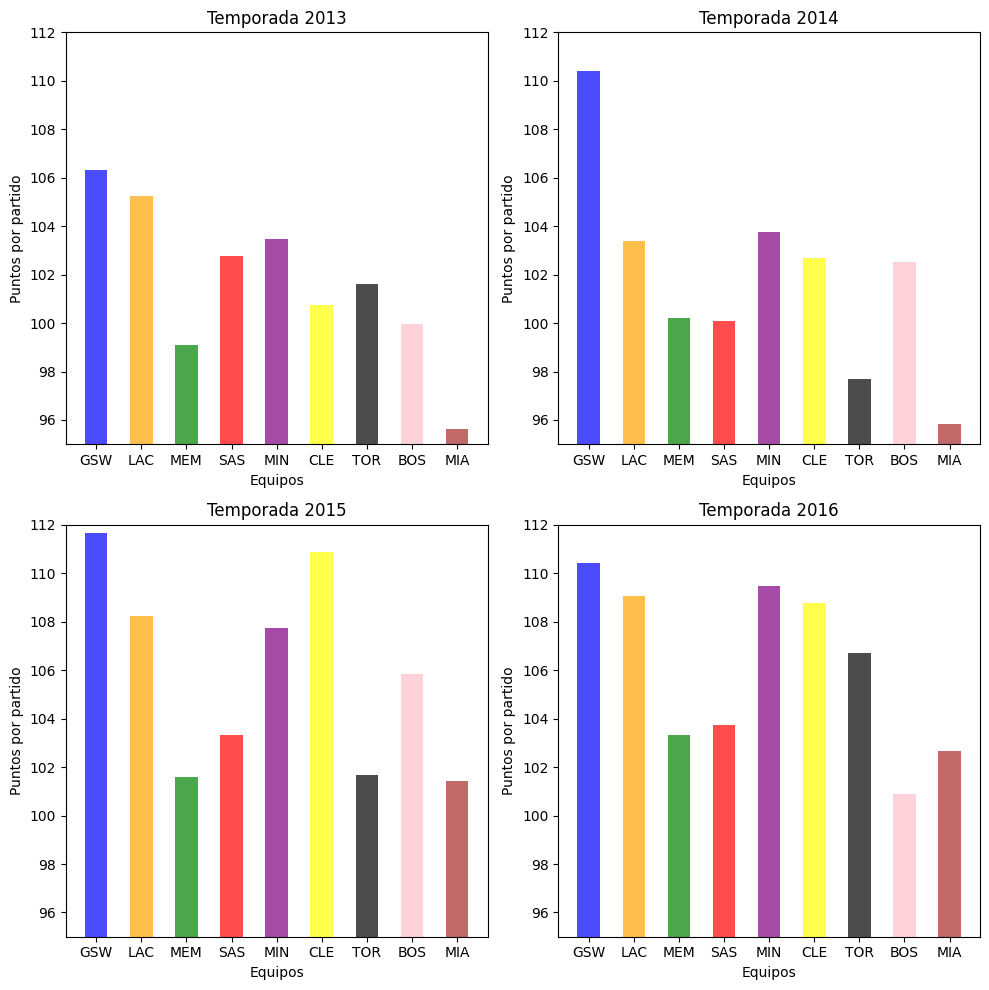

In [510]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, valor in dicc_iterar.items():
    i = int(i)
    total_puntos_por_partido_gsw = teams_medias_temporadas[0]['Media Puntos'][i]
    total_puntos_por_partido_lac = teams_medias_temporadas[1]['Media Puntos'][i]
    total_puntos_por_partido_mem = teams_medias_temporadas[2]['Media Puntos'][i]
    total_puntos_por_partido_sas = teams_medias_temporadas[3]['Media Puntos'][i]
    total_puntos_por_partido_min = teams_medias_temporadas[4]['Media Puntos'][i]
    total_puntos_por_partido_cle = teams_medias_temporadas[5]['Media Puntos'][i]
    total_puntos_por_partido_tor = teams_medias_temporadas[6]['Media Puntos'][i]
    total_puntos_por_partido_bos = teams_medias_temporadas[7]['Media Puntos'][i]
    total_puntos_por_partido_mia = teams_medias_temporadas[8]['Media Puntos'][i]

    # Crear un gráfico de pie para la temporada 
    ax = axs[i // 2, i % 2]
    ax.bar(['GSW', 'LAC', 'MEM', 'SAS', 'MIN', 'CLE', 'TOR', 'BOS', 'MIA'],
            [total_puntos_por_partido_gsw, total_puntos_por_partido_lac, total_puntos_por_partido_mem, total_puntos_por_partido_sas, total_puntos_por_partido_min, total_puntos_por_partido_cle, total_puntos_por_partido_tor, total_puntos_por_partido_bos, total_puntos_por_partido_mia],
            color=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'black', 'pink', 'brown'],  # Cambiar colores de las barras
            alpha=0.7,  # Cambiar la transparencia de las barras
            width=0.5)  # Cambiar el ancho de las barras)
    ax.set_title(f'Temporada {2006+valor}')
    ax.set_ylim(95, 112)
    ax.set_ylabel('Puntos por partido')
    ax.set_xlabel('Equipos')


# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 2014 es la primera temporada de LeBron en los Cavs

- Hago las mismas gráficas pero cada una de un equipo en vez de así?